<a href="https://colab.research.google.com/github/voquangtuong/AAA_drought_prediction/blob/main/T4_tunner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
os.chdir('/content/drive/MyDrive/dynamic/T4_old_tnner')
outs=['save_model_T4','save_pickle','table_T4','fig_T4']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)

In [17]:
# Run functions
%run customize_functions.ipynb

In [18]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 19 00:18:39 2021
Bo het historical NDI o droplist1a

@author: Administrator
"""

# from lstm_utils import *
import pickle
from sklearn.preprocessing import MinMaxScaler
####LIBRARY
import scipy
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from tensorflow.keras import Sequential

from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow import keras # tai sao import tu tensorflow
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
# =============================================================================
# Import library
# import os 

# =============================================================================
# -*- coding: utf-8 -*-
"""all_utils.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ydQW-LmuXBguZbpvhMM2-LpdkVfdpRrg
"""

# !pip install -q -U keras-tuner --q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

####LIBRARY
import scipy
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from tensorflow.keras import Sequential, optimizers, backend
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow import keras # tai sao import tu tensorflow
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# ROC
import datetime
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# import statsmodels as sm
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib
###  SET FONTS FOR PLOTTING
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
### cap nhat font
# plt.rcParams.update({'font.size': 14})

####RANDOM SEED SET
#tf.random.set_seed(10000000)
#np.random.seed(10000000)

####PANDAS LIB
from pandas import DataFrame
from pandas import concat
###### Univrate LSTM
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
######## Keras tunner
# import keras_tuner as kt
!python lstm_utils.py 



In [19]:

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)
    
# kiem tra cho ganghwa
k=29
n_in0=3
n_out0=1
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
df1=df0.iloc[:(2016-1968+1)*12,:]
# df1=df0 # du bao het
# =============================================================================

# =============================================================================
# Chuyen qua suppervised. Chon n_out0=3, n_in0=1 da kiem tra do khong mat so cuoi
# no chi mat so dau
# def sample_generate_M3(dataset,n_in0,n_out0):
df2=series_to_supervised_df(df1,n_in0,n_out0)

# =============================================================================
# =============================================================================
#     remove values PRS  at fure prediction
# var3(t),var2(t),var1(t) have to remove
list_drops=[np.arange(2,5)*-1,np.arange(2,9)*-1,np.arange(2,13)*-1]
list_drops1=[[],[],[]]
list_drops1a=[[-5,-9,-13],[-5,-9,-13,-17],[-5,-9,-13,-17,-21]]


# =============================================================================
df3=df2.drop(df2.columns[[list_drops1[n_out0-1]]],axis=1)
df4=df3.drop(df3.columns[[list_drops1a[n_out0-1]]],axis=1)

# =============================================================================
# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
n_features=1
train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

    
    # return train_X, y_train_scale, val_X,y_val_scale,test_X,y_test_scale,scaler_y,n_train,n_val

# Chuyen qua dinh danh cua 3D tensorflow: sample, timesteps, feature
# Kiem tra lai trong sach 


/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


# Define model


Epoch 1/1500
11/11 [==============================] - 2s 41ms/step - loss: 0.2263 - mse: 0.2263 - val_loss: 0.2214 - val_mse: 0.2214
Epoch 2/1500
11/11 [==============================] - 0s 13ms/step - loss: 0.1657 - mse: 0.1657 - val_loss: 0.1539 - val_mse: 0.1539
Epoch 3/1500
11/11 [==============================] - 0s 13ms/step - loss: 0.1091 - mse: 0.1091 - val_loss: 0.0888 - val_mse: 0.0888
Epoch 4/1500
11/11 [==============================] - 0s 13ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 5/1500
11/11 [==============================] - 0s 12ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 6/1500
11/11 [==============================] - 0s 12ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 7/1500
11/11 [==============================] - 0s 12ms/step - loss: 0.0342 - mse: 0.0342 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 8/1500
11/11 [==============================] - 0s 13ms/step - 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Loaded model from disk
[906] [0.00724113]


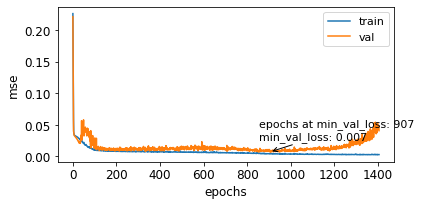

In [20]:

# =============================================================================

# =============================================================================
# =============================================================================
# Define model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
# =============================================================================
opt = Adam(learning_rate = 0.0009, clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
callbacks_list = [
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=500,
mode="min",
),
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
)
]

model.compile(optimizer=Adam(learning_rate = 0.00095, clipnorm = 1.001),
loss="mse",
metrics=["mse"])
# Fit model

history1=model.fit(train_X,
          y_train_scale,
epochs=1500,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale))
# =============================================================================
# # Save loss values
# with open(outs[1]+'/'+str(k)+'lead'+str(m)+'T3_lag3loss.csv', 'wb') as f1: # khong nen
#   # compressed_file = bz2.BZ2File(f, 'w')
#     w = csv.DictWriter(f1, history1.history.keys())
#     w.writeheader()
#     w.writerow(history1)

# # #####
# ## mo kiem tra lai
# with open(outs[1]+'/'+str(k)+'lead'+str(m)+'T3_lag3loss.csv', 'rb') as f2: # khong nen
#     # compressed_file = bz2.BZ2File(f, 'r')
#     load_history1 = csv.DictReader(f2)
# # 0,1,2 tuong ung voi train, val, test
# # pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# # print('cc of val: '+str(pearson))
# =============================================================================
# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+str(k)+"lead"+str(m)+"best_stop.keras")
print("Loaded model from disk")

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# ve learning rate to load model
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history1.history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)

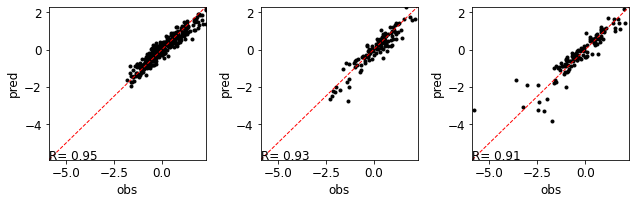

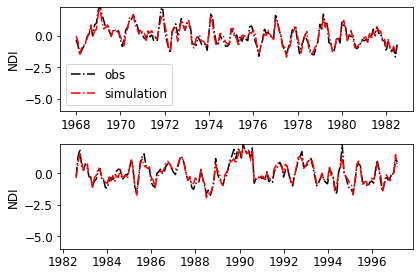

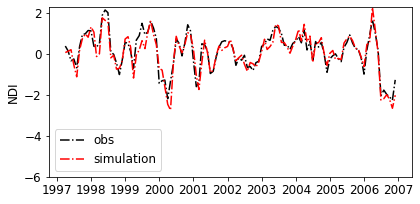

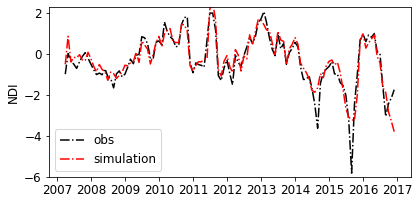

In [21]:

#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# LUU LAI KET QUA
# =============================================================================
with open(outs[1]+'/'+str(k)+'lead'+str(m)+'T3_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+str(k)+'lead'+str(m)+'T3_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    # fig,ax=plt.subplots(figsize=(5,5))
    # min_values1=np.min([pred_all[m],obs_all[m]])
    # min_values=min_values1
    # max_values1=np.max([pred_all[m],obs_all[m]])
    # max_values=max_values1
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_T3'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve train
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  # plt.plot(vector_date[n_in0+lead_time:n_train-n_out0+lead_time+1], obs1[n_in0+lead_time:n_train-n_out0+lead_time+1,lead_time], 'k-.')
  # plt.plot(vector_date[n_in0+lead_time:n_train+-n_out0+lead_time+1], pred1[:,lead_time], 'r-.')
  
  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  
  
  
  # plt.plot(vector_date[int(dataset0.shape[0]*0.3):int(dataset0.shape[0]*0.6)]+lead_time-n_out0+1, pred[int(dataset0.shape[0]*0.3):int(dataset0.shape[0]*0.6)+lead_time-n_out0+1,lead_time],'r-.')
  # plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')

  # plt.plot(vector_date[n_in0+lead_time:n_train-n_out0+lead_time+1], obs1[n_in0+lead_time:n_train-n_out0+lead_time+1,lead_time], 'k-.')
  # plt.plot(vector_date[n_in0+lead_time:n_train+-n_out0+lead_time+1], pred1[:,lead_time], 'r-.')
  
  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at validation')
  plt.tight_layout()

  # plt.subplot(212)
  # plt.rcParams.update({'font.size': 12})
  # plt.plot(vector_date[int(dataset0.shape[0]*0.3):int(dataset0.shape[0]*0.6)+lead_time-n_out0+1], 
  #          obs[int(dataset0.shape[0]*0.3)+input:int(dataset0.shape[0]*0.6)+lead_time-n_out0+1,lead_time], 'k-.')
  
  # plt.plot(vector_date[int(dataset0.shape[0]*0.3):int(dataset0.shape[0]*0.6)]+lead_time-n_out0+1, pred[int(dataset0.shape[0]*0.3):int(dataset0.shape[0]*0.6)+lead_time-n_out0+1,lead_time],'r-.')
  # plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # Testing
  
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  vector_date_test=vector_date[-24:]
  # plt.plot(vector_date[n_train+n_val+lead_time:n_train+n_val+n_test+lead_time+obs3.shape[0]],obs3[:,lead_time],'k-.')
  # plt.plot(vector_date[n_train+n_val+lead_time:n_train+n_val+lead_time+n_test+obs3.shape[0]],pred3[:,lead_time],'r-.')
  plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
  plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
  # plt.plot(vector_date[n_in0+lead_time:n_train-n_out0+lead_time+1], obs1[n_in0+lead_time:n_train-n_out0+lead_time+1,lead_time], 'k-.')
  # plt.plot(vector_date[n_in0+lead_time:n_train+-n_out0+lead_time+1], pred1[:,lead_time], 'r-.')
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1month' +' lead time prediction at testing')
  plt.tight_layout()

  # plt.subplot(212)
  # plt.rcParams.update({'font.size': 12})
  # plt.plot(vector_date[int(dataset0.shape[0]*0.3):int(dataset0.shape[0]*0.6)+lead_time-n_out0+1], 
  #          obs[int(dataset0.shape[0]*0.3)+input:int(dataset0.shape[0]*0.6)+lead_time-n_out0+1,lead_time], 'k-.')
  
  # plt.plot(vector_date[int(dataset0.shape[0]*0.3):int(dataset0.shape[0]*0.6)]+lead_time-n_out0+1, pred[int(dataset0.shape[0]*0.3):int(dataset0.shape[0]*0.6)+lead_time-n_out0+1,lead_time],'r-.')
  # plt.legend(['obs','simulation'])

  # plt.ylabel('NDI')
  # plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
